In [1]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp
from PIL import Image

2022-04-04 15:00:42.661794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-04 15:00:42.661824: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
model = tf.keras.models.load_model('model_transfer_crop.h5')

2022-04-04 15:00:45.304353: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tivi/.local/share/virtualenvs/projet-4-groupe-4-gsk5EPr-/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-04 15:00:45.304385: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-04 15:00:45.304408: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tivi-ThinkPad-T460s): /proc/driver/nvidia/version does not exist
2022-04-04 15:00:45.304591: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appro

<class 'numpy.ndarray'>
FACE NUMBER: 1
FACE CONFIDENCE: 0.84
nFACE BOUNDING BOX:nxmin: 0.25947198271751404
ymin: 0.3949650526046753
width: 0.15488693118095398
height: 0.2753545641899109

<class 'numpy.ndarray'>


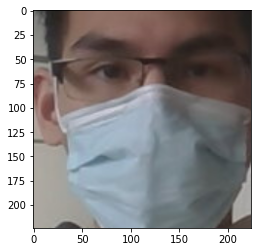

[[7.3640854e-18]]
Mask
FACE NUMBER: 2
FACE CONFIDENCE: 0.4
nFACE BOUNDING BOX:nxmin: 0.6403305530548096
ymin: 0.43596094846725464
width: 0.12510496377944946
height: 0.22240817546844482

<class 'numpy.ndarray'>


[[0.98958445]]
No mask


In [10]:
image = cv2.imread('2.jpg')
print(type(image))
h, w, c = image.shape
image_input = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(model_selection=0, min_detection_confidence=0.3)
mp_drawing = mp.solutions.drawing_utils
face_detection_results = face_detection.process(image_input)

if face_detection_results.detections:

    for face_no, face in enumerate(face_detection_results.detections):

        print(f'FACE NUMBER: {face_no+1}')
        print('==============================')

        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')

        face_data = face.location_data

        print(f'nFACE BOUNDING BOX:n{face_data.relative_bounding_box}')
        
        box = face_data.relative_bounding_box
        
        xleft = int(box.xmin*w)
        xtop = int(box.ymin*h)
        xright = int(box.width*w + xleft)
        xbottom = int(box.height*h + xtop)
        
        detected_faces = [(xleft, xtop, xright, xbottom)]
        
        for n, face_rect in enumerate(detected_faces):
            face = Image.fromarray(image).crop(face_rect)
            face_np = np.asarray(face)
            print(type(face_np))
            
            img_size = 224

            new_array = cv2.resize(face_np, (img_size, img_size))
            new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
            final_image = np.expand_dims(new_array, axis=0)
            final_image = final_image/255.0
            
            plt.imshow(new_array)
            plt.show()
            
            prediction = model.predict(final_image)
            print(prediction)
            if prediction > 0.000001:
                print("No mask")
            else:
                print("Mask")
else:
    print("No face detected")

In [10]:
#img_array = cv2.imread("179179_faces.jpg")
img_size = 224

new_array = cv2.resize(face_np, (img_size, img_size))
new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB)
final_image = np.expand_dims(new_array, axis=0)
final_image = final_image/255.0
#plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
#plt.show()

In [ ]:
final_image.shape

In [ ]:
plt.imshow(new_array)

In [ ]:
prediction = model.predict(final_image)

In [ ]:
prediction

In [ ]:
if prediction > 0.000001:
    print("No mask")
else:
    print("Mask")